In [77]:
import numpy as np
import pandas as pd
 
#@markdown Plotting style (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/))
matplotlib_style = 'seaborn' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib.pyplot as plt
plt.style.use(matplotlib_style)
%matplotlib inline
import seaborn as sns

#@markdown Resolution of the plot outputs (`retina` is the highest resolution)
notebook_screen_res = 'retina' #@param ['retina', 'png', 'jpeg', 'svg', 'pdf']
%config InlineBackend.figure_format = notebook_screen_res

# Heart Disease UCI
- [UCI](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
- [kaggle.com](https://www.kaggle.com/ronitf/heart-disease-uci)

## EDA

In [78]:
heart_df = pd.read_csv("heart.csv")
print(heart_df.shape)
heart_df.head(10)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


1. `age`
2. `sex`: 1 = male, 0 = female
3. `cp` chest pain type (4 values)
4. `trestbps` resting blood pressure
5. `chol` serum cholestoral in mg/dl
6. `fbs` fasting blood sugar > 120 mg/dl
7. `restecg` resting electrocardiographic results (values 0,1,2)
8. `thalach` maximum heart rate achieved
9. `exang` exercise induced angina
10. `oldpeak` ST depression induced by exercise relative to rest
11. `slope` the slope of the peak exercise ST segment
12. `ca` number of major vessels (0-3) colored by flourosopy
13. `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. `target`: 1 = heart disease, 0 = no heart disease

In [79]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [80]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [83]:
cat_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
heart_df[cat_columns].astype("category").describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal
count,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4
top,1,0,0,1,0,2,0,2
freq,207,143,258,152,204,142,175,166


In [84]:
print(f"{heart_df.sex.value_counts()} \n (1 = male; 0 = female) \n")
print(f"{heart_df.target.value_counts()} \n (1 = disease; 0 = no disease) \n")

1    207
0     96
Name: sex, dtype: int64 
 (1 = male; 0 = female) 

1    165
0    138
Name: target, dtype: int64 
 (1 = disease; 0 = no disease) 



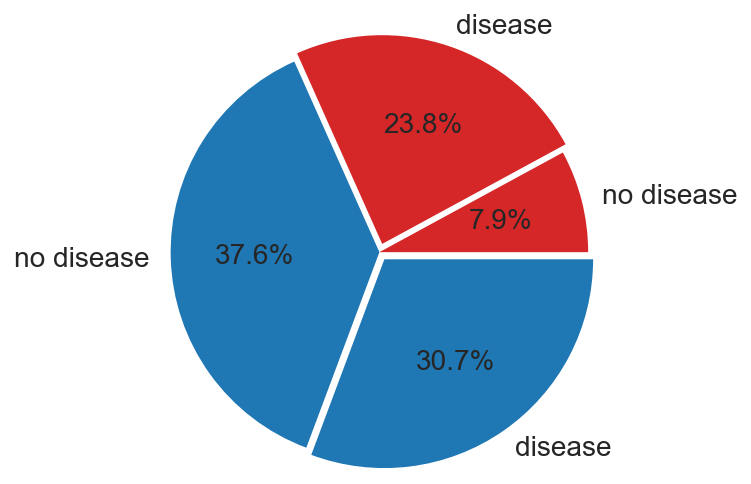

In [85]:
plt.pie(heart_df.groupby(["sex", "target"]).size(), 
        labels=["no disease", "disease", "no disease", "disease"],
        colors=["tab:red", "tab:red", "tab:blue", "tab:blue"],
        explode = (0, 0.05, 0, 0.05),
        autopct="%1.1f%%", radius=1.2, textprops={"fontsize": 14})
plt.show()

Numeric variables:

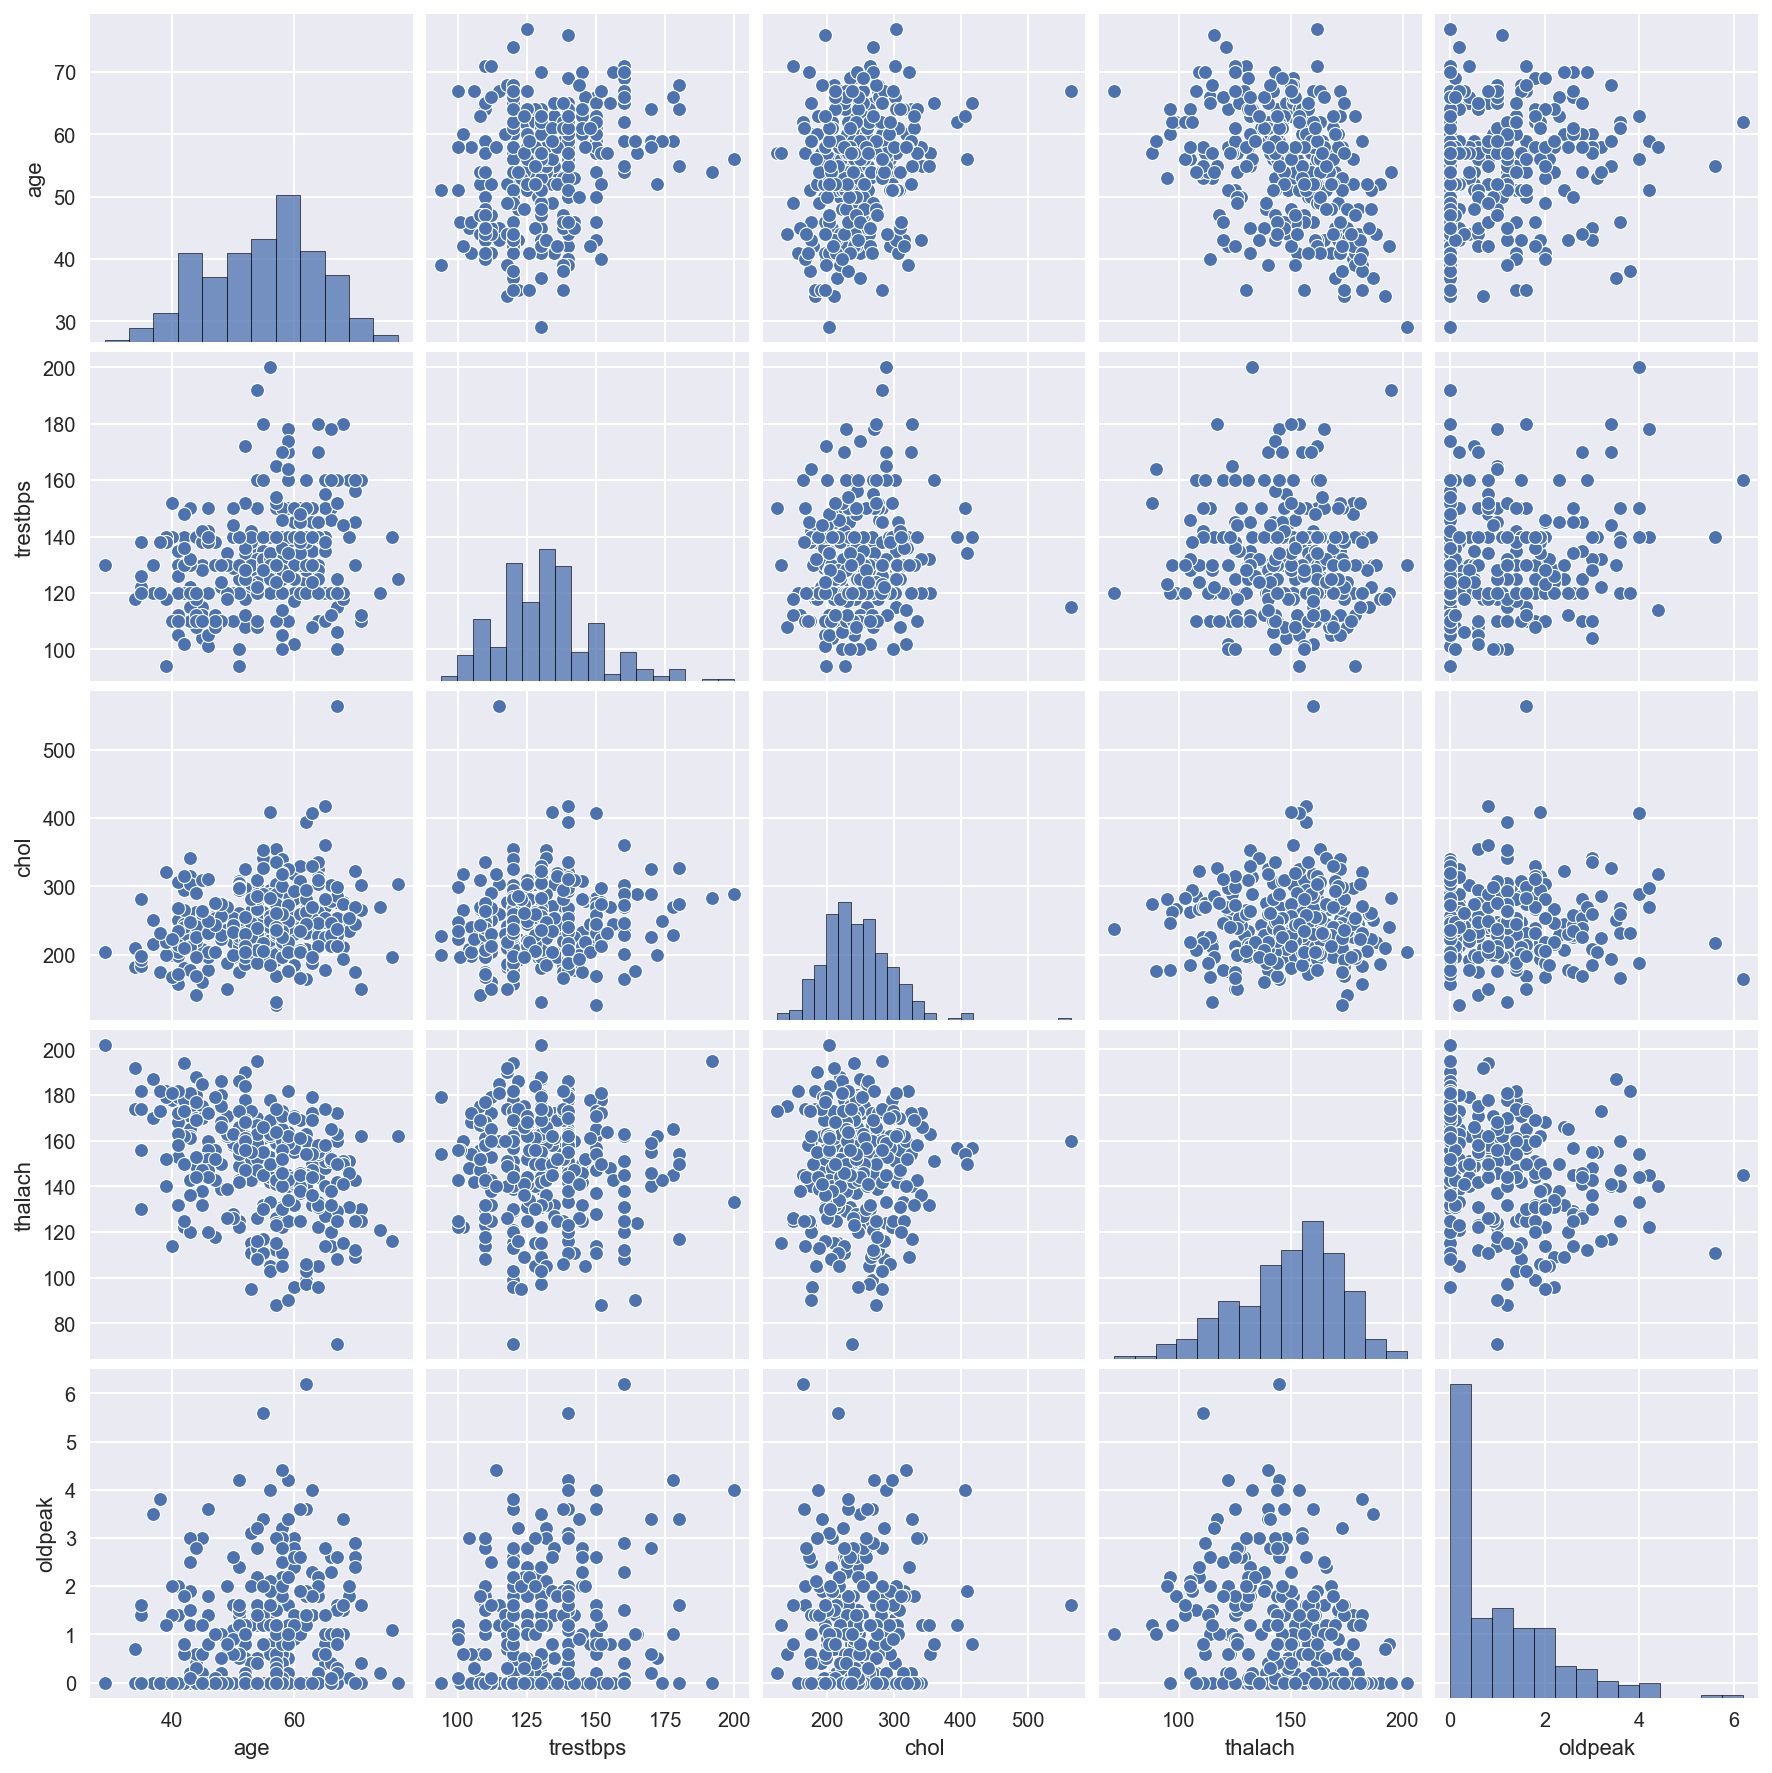

In [86]:
real_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
sns.pairplot(heart_df[real_columns]);

Relationship between numeric variables and target:

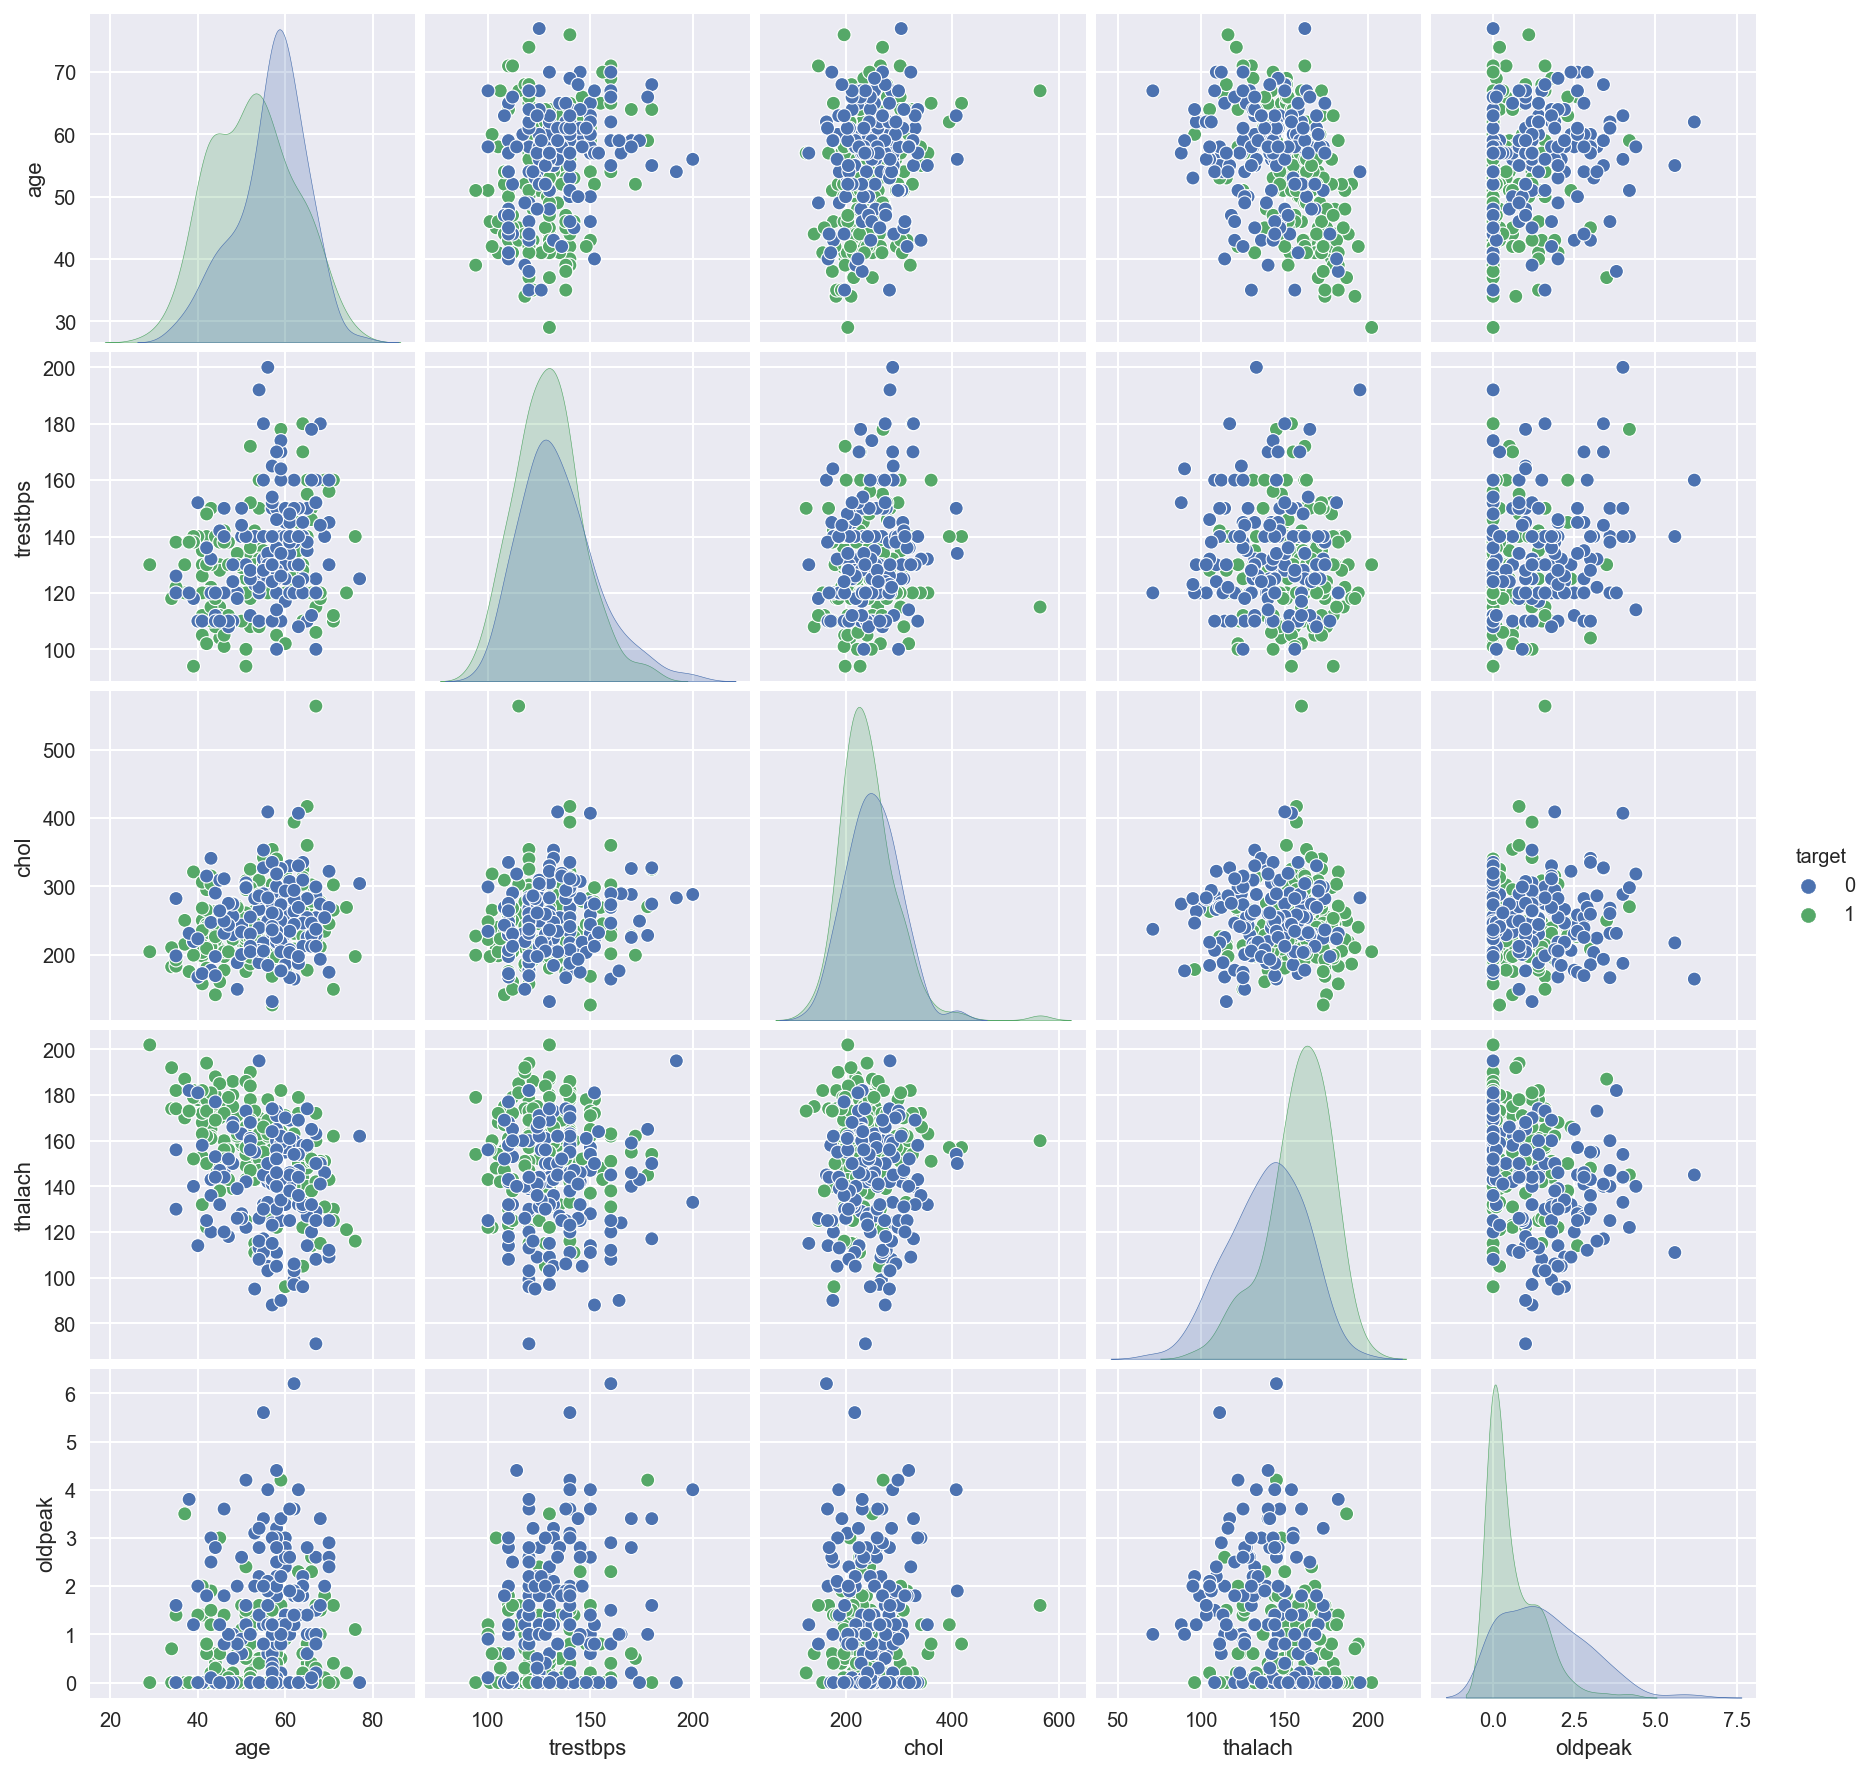

In [87]:
sns.pairplot(heart_df, vars=real_columns, hue="target");

## Model

In [88]:
import os
import pickle
import optuna

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [89]:
heart_df[cat_columns].astype("category").describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal
count,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4
top,1,0,0,1,0,2,0,2
freq,207,143,258,152,204,142,175,166


In [90]:
features_df = pd.get_dummies(heart_df.drop("target", axis=1), columns=cat_columns)
scaler = StandardScaler()
features_df[real_columns] = scaler.fit_transform(heart_df[real_columns])
features_df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [91]:
X_train, X_test, y_train, y_test = train_test_split(features_df, heart_df.target, 
                                                    test_size=0.2, random_state=42)

In [92]:
%%time
optuna.logging.set_verbosity(optuna.logging.WARNING) # disable warnings


def create_model(trial):
    regularization = trial.suggest_uniform("logistic-regularization", 1e-4, 1)
    lr_intercept_scaling = trial.suggest_uniform("lr_intercept_scaling", 1e-4, 1)
    model = LogisticRegression(C=regularization, solver="liblinear", 
                               intercept_scaling=lr_intercept_scaling)
    if trial.should_prune():
        raise optuna.TrialPruned() 
    return model


def objective(trial):
    model = create_model(trial)
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring="f1")
    accuracy = score.mean()
    with open(os.path.join("models", f"{trial.number}.pkl"), "wb") as f:
        pickle.dump(model, f)
    return accuracy


os.makedirs("models", exist_ok=True)
study = optuna.create_study(direction="maximize");
study.optimize(objective, n_trials=200);

print(f"Mean f1-score (cv=5): {study.best_value:.3f}")
print(f"Best parameters: {study.best_params}\n")

Mean f1-score (cv=5): 0.859
Best parameters: {'logistic-regularization': 0.23967744421105225, 'lr_intercept_scaling': 0.576974090758662}

CPU times: user 7.14 s, sys: 436 ms, total: 7.58 s
Wall time: 17.1 s


In [93]:
with open(os.path.join("models", f"{study.best_trial.number}.pkl"), "rb") as f:
    best_clf = pickle.load(f)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Test f1-score: {f1_score(y_test, y_pred):.3f}")

Test accuracy: 0.902
Test f1-score: 0.903


In [94]:
cv_acc_mean = cross_val_score(best_clf, features_df, heart_df.target, scoring="roc_auc", cv=5).mean()
print(f"{cv_acc_mean:.3f}")

0.920


Cutoff selection (FPR).

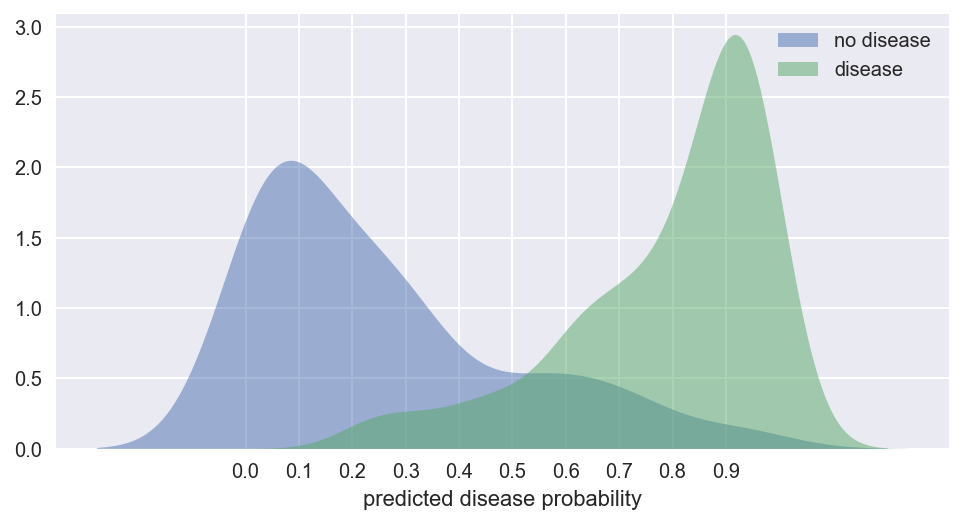

In [95]:
def plot_preds_kde(y_proba, true_label):
    plt.figure(figsize=(8, 4))
    ax = sns.kdeplot(y_proba[true_label==0], label="no disease", linewidth=0, alpha=.5, fill=True)    
    ax = sns.kdeplot(y_proba[true_label==1], label="disease", linewidth=0, alpha=.5, fill=True)
    plt.xticks(np.arange(0,1, 0.1))
    plt.xlabel("predicted disease probability")
    plt.ylabel("")
    plt.legend();


plot_preds_kde(best_clf.predict_proba(X_train)[:, 1], y_train)